In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../../../../../../CS 846 project data/new_pullreq.csv") 

In [3]:
data.columns

Index(['id', 'project_id', 'ownername', 'reponame', 'merged_or_not',
       'lifetime_minutes', 'mergetime_minutes', 'num_commits', 'src_churn',
       'test_churn',
       ...
       'other_comment', 'num_comments_con', 'num_code_comments',
       'num_code_comments_con', 'integrator_availability', 'friday_effect',
       'contrib_rate_author', 'reopen_or_not', 'first_close_minutes',
       'reopen_num'],
      dtype='object', length=118)

In [7]:
pd.set_option('display.max_columns', None)
data

,id,project_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,src_churn,test_churn,files_added,files_deleted,files_modified,files_changed,src_files,doc_files,other_files,num_commit_comments,num_issue_comments,num_comments,num_participants,sloc,team_size,perc_external_contribs,commits_on_files_touched,test_lines_per_kloc,test_cases_per_kloc,asserts_per_kloc,watchers,prev_pullreqs,requester_succ_rate,followers,churn_addition,churn_deletion,pr_comment_num,comment_num,perc_neg_emotion,perc_pos_emotion,perc_neu_emotion,part_num_issue,part_num_commit,part_num_pr,part_num_code,comment_conflict,hash_tag,at_tag,test_inclusion,description_length,bug_fix,ci_exists,ci_latency,ci_build_num,ci_test_passed,ci_failed_perc,ci_first_build_status,ci_last_build_status,language,fork_num,project_age,open_issue_num,pr_succ_rate,open_pr_num,first_response_time,pushed_delta,acc_commit_num,first_pr,account_creation_days,core_member,contrib_gender,contrib_country,contrib_affiliation,contrib_open,contrib_cons,contrib_extra,contrib_agree,contrib_neur,perc_contrib_neg_emo,perc_contrib_pos_emo,perc_contrib_neu_emo,contrib_first_emo,prior_review_num,inte_country,inte_affiliation,inte_open,inte_cons,inte_extra,inte_agree,inte_neur,perc_inte_neg_emo,perc_inte_pos_emo,perc_inte_neu_emo,inte_first_emo,contrib_follow_integrator,prior_interaction,social_strength,same_country,same_affiliation,open_diff,cons_diff,extra_diff,agree_diff,neur_diff,has_comments,has_participants,has_exchange,contrib_comment,inte_comment,reviewer_comment,other_comment,num_comments_con,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num
0,1,13708387,stylelint,stylelint,1,237,237.0,1,0,0,0,0,1,1,0,0,1,0,1,1,1,14668.0,15,0.089869,79,745.04600,0.00000,0.000000,2070,14,1.000000,118,0,0,0,1,0.000000,0.000000,1.000000,1,0,0,0,0,1,0,0,4926,NaN,1.0,274.0,1.0,1.0,0.0,success,success,JavaScript,140,21,52,0.978469,25,237.0,196583.0,28,0,353,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,NaN,14,NaN,NaN,0.805841,0.629980,0.468658,0.658221,0.541352,0.0,0.0,1.0,neutral,0,28,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,1,1,0,0,0,0,30.0,1,0.007948,0,237,0
1,2,100297899,Joaogarciadelima,checklistos,0,1410,NaN,1,0,0,0,0,1,1,0,0,0,0,2,2,1,474.0,2,0.014019,38,147.48200,16.18700,21.582700,1,299,1.000000,38,0,0,0,2,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,1312,NaN,1.0,79.0,1.0,0.0,1.0,failure,failure,Python,1,6,1,1.000000,7,NaN,9.0,432,0,1092,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,NaN,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0,300,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,0,2,0,0,597.0,0,0.830769,0,1410,0
2,3,93139005,binary-com,SmartCharts,1,4,4.0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,34921.0,5,0.256849,175,4.64599,0.00000,0.114012,5,81,0.987654,33,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,4,NaN,1.0,88.0,1.0,1.0,0.0,success,success,JavaScript,11,6,0,0.996324,10,NaN,5743.0,652,0,1884,1,male,malaysia,NaN,0.796278,0.656912,0.485889,0.655315,0.609593,0.0,0.000000,0.000000,NaN,94,malaysia,NaN,0.796278,0.656912,0.485889,0.655315,0.609593,0.0,0.0,0.0,NaN,0,505,0.428571,1.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,2.0,0,0.314368,0,4,0
3,4,15059440,letsencrypt,boulder,1,52,52.0,1,9,104,0,0,2,2,2,0,0,0,0,0,0,143159.0,5,0.014706,24,120.71000,0.00000,10.109800,2194,293,0.989761,222,110,3,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,1,94,NaN,1.0,489.0,1.0,1.0,0.0,success,success,Go,269,37,212,0.986523,29,NaN,978.0,1050,0,3489,1,male,canada,NaN,0.814346,0.633765,0.471257,0.666831,0.485847,0.0,0.000000,0.000000,NaN,679,NaN,NaN,0.818143,0.630804,0.466899,0.650931,0.496465,0.0,0.0,0.0,NaN,1,460,0.138889,NaN,NaN,0.003796,0.002961,0.004358,0.015900,0.010618,0,0,0,0,0,0,0,0,0,0,1.0,0,0.117332,0,52,0
4,5,29684214,PyCQA,astroid,1,2414,2414.0,1,33,27,0,0,2,2,2,0,0,0,1,1,1,6247.0,2,0.173077,7,554.16800,28.61830,84.142200,131,3,1.000000,1,60,0,0,

In [9]:
# checking for null and non-null values in same country column
null_samecountry=data['same_country'].isna().sum()
nonnull_samecountry= data.shape[0]-null_samecountry
print("Same country column: Null records- {}, Non-null records- {}".format(null_samecountry,nonnull_samecountry))

Same country column: Null records- 2238549, Non-null records- 1109388


In [10]:
# checking for null and non-null values in same affiliation column
null_sameaffil=data['same_affiliation'].isna().sum()
nonnull_sameaffil= data.shape[0]-null_sameaffil
print("Same affiliation column: Null records- {}, Non-null records- {}".format(null_sameaffil,nonnull_sameaffil))

Same affiliation column: Null records- 2707224, Non-null records- 640713


In [13]:
temp=data[data['contrib_country']==data['inte_country']]
temp

,id,project_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,src_churn,test_churn,files_added,files_deleted,files_modified,files_changed,src_files,doc_files,other_files,num_commit_comments,num_issue_comments,num_comments,num_participants,sloc,team_size,perc_external_contribs,commits_on_files_touched,test_lines_per_kloc,test_cases_per_kloc,asserts_per_kloc,watchers,prev_pullreqs,requester_succ_rate,followers,churn_addition,churn_deletion,pr_comment_num,comment_num,perc_neg_emotion,perc_pos_emotion,perc_neu_emotion,part_num_issue,part_num_commit,part_num_pr,part_num_code,comment_conflict,hash_tag,at_tag,test_inclusion,description_length,bug_fix,ci_exists,ci_latency,ci_build_num,ci_test_passed,ci_failed_perc,ci_first_build_status,ci_last_build_status,language,fork_num,project_age,open_issue_num,pr_succ_rate,open_pr_num,first_response_time,pushed_delta,acc_commit_num,first_pr,account_creation_days,core_member,contrib_gender,contrib_country,contrib_affiliation,contrib_open,contrib_cons,contrib_extra,contrib_agree,contrib_neur,perc_contrib_neg_emo,perc_contrib_pos_emo,perc_contrib_neu_emo,contrib_first_emo,prior_review_num,inte_country,inte_affiliation,inte_open,inte_cons,inte_extra,inte_agree,inte_neur,perc_inte_neg_emo,perc_inte_pos_emo,perc_inte_neu_emo,inte_first_emo,contrib_follow_integrator,prior_interaction,social_strength,same_country,same_affiliation,open_diff,cons_diff,extra_diff,agree_diff,neur_diff,has_comments,has_participants,has_exchange,contrib_comment,inte_comment,reviewer_comment,other_comment,num_comments_con,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num
2,3,93139005,binary-com,SmartCharts,1,4,4.0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,34921.0,5,0.256849,175,4.64599,0.00000,0.114012,5,81,0.987654,33,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,4,NaN,1.0,88.0,1.0,1.0,0.0,success,success,JavaScript,11,6,0,0.996324,10,NaN,5743.0,652,0,1884,1,male,malaysia,NaN,0.796278,0.656912,0.485889,0.655315,0.609593,0.0,0.000000,0.000000,NaN,94,malaysia,NaN,0.796278,0.656912,0.485889,0.655315,0.609593,0.0,0.0,0.0,NaN,0,505,0.428571,1.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,2.0,0,0.314368,0,4,0
16,17,46403735,portainer,portainer,1,111,111.0,3,16,0,0,0,4,4,3,1,0,0,0,0,0,20843.0,5,0.116000,24,30.60320,1.48830,0.790661,11145,407,0.982801,240,13,3,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,0,13,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript,1215,33,508,0.947674,55,NaN,97538.0,2235,0,1993,1,male,united states,NaN,0.820670,0.649201,0.497269,0.660651,0.508202,0.0,0.000000,0.000000,NaN,754,united states,NaN,0.820670,0.649201,0.497269,0.660651,0.508202,0.0,0.0,0.0,NaN,0,565,0.238095,1.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,98.0,0,0.659098,0,111,0
21,22,22182978,cynicaloptimist,improved-initiative,1,0,0.0,1,0,0,0,0,2,2,0,1,1,0,0,0,0,52.0,2,0.004950,39,350.00000,25.00000,37.500000,45,41,1.000000,7,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,5,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript,25,28,30,1.000000,0,NaN,48504.0,1007,0,1790,1,male,united states,tableau,0.816425,0.662518,0.506869,0.693114,0.449235,0.0,0.000000,0.000000,NaN,54,united states,tableau,0.816425,0.662518,0.506869,0.693114,0.449235,0.0,0.0,0.0,NaN,0,229,0.333333,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,1313.0,0,0.974831,0,0,0
22,23,46634954,GoogleCloudPlatform,google-cloud-eclipse,1,72,72.0,1,0,0,0,0,1,1,0,0,1,0,1,1,1,21792.0,6,0.102941,5,409.71900,40.92850,50.869500,13,183,0.978142,34,0,0,0,1,0.000000,0.000000,0.000000,1,0,0,0,0,1,1,0,9,NaN,1.0,1597.0,1.0,1.0,0.0,success,success,Java,7,12,256,0.984252,16,27.0,10218.0,835,0,2047,1,female,united states,NaN,0.814276,0.604377,0.452977,0.628203,0.500580,0.0,0.000000,0.000000,NaN,170,united states,NaN,0.814276,0.604377,0.452977,0.628203,0.500580,0.0,0.0,0.0,NaN,0,944,0.857143,1.0,NaN,0.000000,0.000000,0.000000,0

In [14]:
# keeping only the relevant columns and removing NaN same country records
datasubset=data[['project_id', 'ownername', 'reponame','merged_or_not', 'perc_neg_emotion', 'perc_pos_emotion', 'perc_neu_emotion', 'contrib_gender', 'contrib_country', 'contrib_affiliation', 'inte_country', 'same_country', 'same_affiliation']].dropna(subset=['same_country'])
datasubset

,project_id,ownername,reponame,merged_or_not,perc_neg_emotion,perc_pos_emotion,perc_neu_emotion,contrib_gender,contrib_country,contrib_affiliation,inte_country,same_country,same_affiliation
2,93139005,binary-com,SmartCharts,1,0.000000,0.000000,0.000000,male,malaysia,NaN,malaysia,1.0,NaN
11,73033219,Zeit,docs,1,0.000000,0.000000,1.000000,male,peru,NaN,united kingdom,0.0,NaN
16,46403735,portainer,portainer,1,0.000000,0.000000,0.000000,male,united states,NaN,united states,1.0,NaN
21,22182978,cynicaloptimist,improved-initiative,1,0.000000,0.000000,0.000000,male,united states,tableau,united states,1.0,1.0
22,46634954,GoogleCloudPlatform,google-cloud-eclipse,1,0.000000,0.000000,0.000000,female,united states,NaN,united states,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347926,22070816,FormidableLabs,victory,1,0.000000,0.000000,0.000000,female,united states,NaN,united states,1.0,NaN
3347927,55688056,zsmartsystems,com.zsmartsystems.zigbee,1,0.000000,0.000000,0.000000,male,united kingdom,NaN,united kingdom,1.0,NaN
3347930,28904919,plotly,plotly.js,1,0.000000,0.285714,0.714286,male,united states,NaN,united states,1.0,NaN
3347933,1142,saltstack,salt,0,0.000000,0.333333,0.666667,male,united states,NaN,united states,1.0,NaN


In [15]:
# added regions simililar to other questions

sub_saharan_africa = ["angola","benin","botswana","burkina faso","burundi","cabo verde","cameroon","central african republic","chad" "comoros ","congo","cote d'ivoire","democratic republic of the congo","djibouti","equatorial guinea","eritrea","ethiopia","gabon","gambia","ghana","guinea","guinea-bissau ","kenya","lesotho","liberia","madagascar","malawi","mali","mauritania","mauritius","mayotte","mozambique" "namibia","niger","nigeria","reunion","rwanda","sao tome and principe","senegal","seychelles","sierra leone","somalia","south africa","south sudan","swaziland","togo","uganda","tanzania","zambia","zimbabwe"]
northern_africa = ["algeria", "egypt", "libya", "morocco", "sudan", "tunisia", "western sahara"]
western_asia =  ["azerbaijan", "armenia", "bahrain", "cyprus", "georgia", "iraq", "israel", "jordan", "kuwait", "lebanon", "palestinian territories", "oman", "qatar", "saudi arabia", "syria", "turkey", "united arab emirates", "yemen"]
central_asia =["kazakhstan", "kyrgyzstan", "tajikistan", "turkmenistan", "uzbekistan"]
southern_asia = ["afghanistan", "bangladesh", "bhutan", "india", "iran", "maldives", "nepal", "pakistan", "sri lanka"]
eastern_asia = ["vietnam","taiwan","macau","laos","china", "hong kong", "china, macao sar", "south korea", "japan", "mongolia", "north korea"]
south_eastern_asia = ["brunei", "cambodia", "indonesia", "lao people's democratic republic", "malaysia", "myanmar", "philippines", "singapore", "thailand", "timor-leste", "viet nam"]
caribbean = ["anguilla", "antigua and barbuda", "aruba", "bahamas", "barbados", "bonaire, sint eustatius and saba", "virgin islands", "cayman islands", "cuba", "curacao", "dominica", "dominican republic", "grenada", "guadeloupe", "haiti", "jamaica", "martinique", "montserrat", "puerto rico", "saint kitts and nevis", "saint lucia", "saint vincent and the grenadines", "sint maarten (dutch part)", "trinidad and tobago", "turks and caicos islands", "united states virgin islands"]
central_america = ["belize", "honduras", "costa rica", "el salvador", "guatemala", "mexico", "nicaragua", "panama"]
south_america = ["argentina", "bolivia", "brazil", "chile", "colombia", "ecuador", "french guiana", "falkland islands (malvinas)", "south georgia & the south sandwich islands", "guyana", "paraguay", "peru", "suriname", "uruguay", "venezuela"]
australia_and_new_zealand = ["australia", "christmas island", "cocos (keeling) islands", "heard island & mcdonald islands", "norfolk island", "new zealand"]
melanesia = ["fiji", "new caledonia", "papua new guinea", "solomon islands", "vanuatu"]
micronesia = ["kiribati", "marshall islands", "micronesia (federated states of)", "nauru", "northern mariana islands", "palau", "guam"]
polynesia = ["french polynesia", "wallis and futuna island", "pitcairn", "cook islands", "niue", "tokelau", "tonga", "tuvalu", "american samoa", "samoa"]
northern_america = ["bermuda", "canada", "greenland", "united states"]
eastern_europe = ["bulgaria", "belarus", "czech republic", "hungary", "moldova", "poland", "romania", "russia", "slovakia", "ukraine"]
western_europe = ["austria", "belgium", "switzerland", "germany", "france", "liechtenstein", "luxembourg", "monaco", "netherlands antilles","netherlands", "jersey", "guernsey"]
northern_europe = ["åland islands", "channel islands", "denmark", "estonia", "faroe islands", "finland", "isle of man", "united kingdom", "iceland", "ireland", "latvia", "lithuania", "norway", "sweden"]
southern_europe = ["albania", "andorra", "bosnia and herzegovina", "croatia", "greece", "italy", "malta", "montenegro", "portugal", "san marino", "serbia", "slovenia", "spain", "macedonia", "kosovo"]

In [16]:
#replacing countries with regions

datasubset.loc[datasubset["contrib_country"].isin(sub_saharan_africa), "contrib_country"] = "sub_saharan_africa"
datasubset.loc[datasubset["contrib_country"].isin(northern_africa), "contrib_country"] = "northern_africa"
datasubset.loc[datasubset["contrib_country"].isin(western_asia), "contrib_country"] = "western_asia"
datasubset.loc[datasubset["contrib_country"].isin(central_asia), "contrib_country"] = "central_asia"
datasubset.loc[datasubset["contrib_country"].isin(southern_asia), "contrib_country"] = "southern_asia"
datasubset.loc[datasubset["contrib_country"].isin(eastern_asia), "contrib_country"] = "eastern_asia"
datasubset.loc[datasubset["contrib_country"].isin(south_eastern_asia), "contrib_country"] = "south_eastern_asia"
datasubset.loc[datasubset["contrib_country"].isin(caribbean), "contrib_country"] = "caribbean"
datasubset.loc[datasubset["contrib_country"].isin(central_america), "contrib_country"] = "central_america"
datasubset.loc[datasubset["contrib_country"].isin(south_america), "contrib_country"] = "south_america"
datasubset.loc[datasubset["contrib_country"].isin(australia_and_new_zealand), "contrib_country"] = "australia_and_new_zealand"
datasubset.loc[datasubset["contrib_country"].isin(melanesia), "contrib_country"] = "melanesia"
datasubset.loc[datasubset["contrib_country"].isin(micronesia), "contrib_country"] = "micronesia"
datasubset.loc[datasubset["contrib_country"].isin(polynesia), "contrib_country"] = "polynesia"
datasubset.loc[datasubset["contrib_country"].isin(northern_america), "contrib_country"] = "northern_america"
datasubset.loc[datasubset["contrib_country"].isin(eastern_europe), "contrib_country"] = "eastern_europe"
datasubset.loc[datasubset["contrib_country"].isin(western_europe), "contrib_country"] = "western_europe"
datasubset.loc[datasubset["contrib_country"].isin(northern_europe), "contrib_country"] = "northern_europe"
datasubset.loc[datasubset["contrib_country"].isin(southern_europe), "contrib_country"] = "southern_europe"
datasubset.loc[datasubset["contrib_country"].isin(["mozambique"]), "contrib_country"] = "sub_saharan_africa"

In [19]:
#region - same/diff country - merged ratio
groupedvalues = datasubset.groupby(['contrib_country','same_country']).agg(merged_ratio=("merged_or_not",'mean'))

In [20]:
groupedvalues=groupedvalues.reset_index()

In [21]:
groupedvalues

,contrib_country,same_country,merged_ratio
0,antarctica,0.0,0.652174
1,antarctica,1.0,0.583333
2,australia_and_new_zealand,0.0,0.836556
3,australia_and_new_zealand,1.0,0.816734
4,caribbean,0.0,0.710660
5,caribbean,1.0,0.688963
6,central_america,0.0,0.876696
7,central_america,1.0,0.767904
8,central_asia,0.0,0.918826
9,central_asia,1.0,0.632075


In [22]:

region_count = groupedvalues.groupby(['contrib_country','same_country']).mean().squeeze().unstack().add_suffix('_mergecount')
print (region_count)

same_country               0.0_mergecount  1.0_mergecount
contrib_country                                          
antarctica                       0.652174        0.583333
australia_and_new_zealand        0.836556        0.816734
caribbean                        0.710660        0.688963
central_america                  0.876696        0.767904
central_asia                     0.918826        0.632075
cocos islands                    1.000000             NaN
eastern_asia                     0.778910        0.781475
eastern_europe                   0.834479        0.791150
gibraltar                        0.777778        0.000000
melanesia                        0.500000        0.125000
micronesia                       1.000000        0.980000
northern_africa                  0.667219        0.491566
northern_america                 0.826213        0.838036
northern_europe                  0.840508        0.854573
pitcairn islands                 0.333333             NaN
polynesia     

In [24]:
#regions where more pull requests are accepted if the integrator and contributor belong to the same country
regions_of_interest=region_count[region_count['0.0_mergecount'] < region_count['1.0_mergecount']]
regions_of_interest

same_country,0.0_mergecount,1.0_mergecount
contrib_country,,
eastern_asia,0.778910,0.781475
northern_america,0.826213,0.838036
northern_europe,0.840508,0.854573
south_america,0.798192,0.819045
south_eastern_asia,0.808166,0.810819
southern_europe,0.794918,0.830826
sub_saharan_africa,0.786702,0.810534
western_asia,0.789407,0.853441
western_europe,0.787646,0.828747


<Figure size 1440x1440 with 0 Axes>

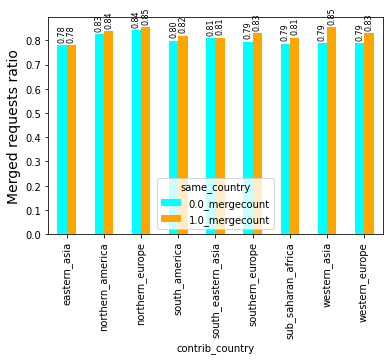

In [34]:
#plot barplot for regions where more pull requests are accepted if the integrator and contributor belong to the same country
plt.figure(figsize=(20, 20))

rq2graph=regions_of_interest.plot(y=["0.0_mergecount", "1.0_mergecount"], kind="bar", color= ["cyan", "orange"])
plt.ylabel("Merged requests ratio", size=14)

for p in rq2graph.patches:
    rq2graph.annotate(format(p.get_height(),'0.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=8,
                   xytext = (0, 12), 
                   textcoords = 'offset points', rotation=90)